In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing import image


Using TensorFlow backend.


In [2]:
MODEL_PATH = 'saved_models/UrbanSoundComplete1.h5' 
model = load_model(MODEL_PATH)

In [3]:
# Saving the Spectrogram of a single audio file
def save_spectrogram(curr_audio_path, curr_audio_name):
    X, sr = librosa.load(curr_audio_path)  # librosa.load() returns an np array and sampling rate(by default 22050)
    plt.specgram(X, Fs=22050)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.plot
    plt.savefig('spectrograms/' + curr_audio_name,  bbox_inches= 'tight' , pad_inches = 0, dpi = 25)

In [4]:
class_names = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

children_playing


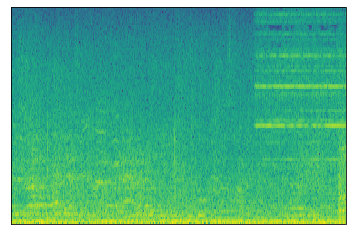

In [5]:
#Testing on an audio file
wav_path = 'testAudio0.wav'
wav_name = os.path.splitext(wav_path)[0]
save_spectrogram(wav_path, wav_name)
png_path = 'spectrograms/' + wav_name + '.png'
png_img = image.load_img(png_path, target_size = (64, 64))
x = image.img_to_array(png_img)
x = np.expand_dims(x, axis = 0)
pred = model.predict(x)
class_idx = np.argmax(pred[0])
predicted_class = class_names[class_idx]
print(predicted_class)

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)        